In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Import header list
with open('adult_income_names.txt','r') as f:
    headers = []
    for line in f:
        f.readline()
        var=line.split(":")[0]
        headers.append(var)

In [8]:
# See categories
headers

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [9]:
# Add income to header list
headers.append("Income")

In [10]:
# Open df and name headers of df with header list
df = pd.read_csv("adult_income_data.csv", names=headers)

In [11]:
# Visualize df
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [12]:
# Locate index of any null values
df.index[df.isnull().any(axis=1)]

Int64Index([], dtype='int64')

In [13]:
# subset df
df2 = df[['age', 'education','occupation']]

In [14]:
# visualize new df
df2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


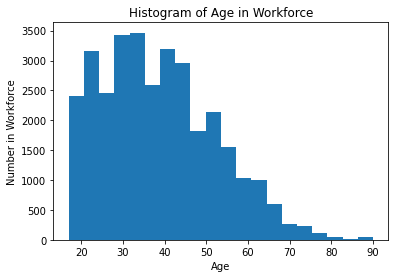

In [15]:
# make histogram of data by age
plt.hist(df2['age'], bins=20)
plt.title("Histogram of Age in Workforce")
plt.xlabel('Age')
plt.ylabel('Number in Workforce')
plt.show()

In [19]:
# define function to remove whitespace
def strip_txt(line):
    return line.strip()

In [20]:
# Create new columns with stripped text
df2['education_stripped'] = df2['education'].apply(strip_txt)
df2['occupation_stripped'] = df2['occupation'].apply(strip_txt)

/Users/saraherbstreit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/saraherbstreit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# Copy new columns to old columns
df2['education'] = df2['education_stripped']
df2['occupation_stripped'] = df2['occupation']

/Users/saraherbstreit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/saraherbstreit/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Remove new columns
df2 = df2.drop(['education_stripped', 'occupation_stripped'], axis=1)

In [23]:
# visualize df
df2.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [112]:
# count number of workers aged 30-50
age_df = df2[(df2['age'] >= 30) & (df['age'] <= 50)]
len(age_df)

16390

In [113]:
# Group together by education and return mean age value
df2.groupby(['education']).mean()

,age
education,
10th,37.429796
11th,32.355745
12th,32.000000
1st-4th,46.142857
5th-6th,42.885886
7th-8th,48.445820
9th,41.060311
Assoc-acdm,37.381443
Assoc-voc,38.553546


In [24]:
# Check age stats by occupation
stat_df = df2.groupby('occupation').describe()['age']
stat_df

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [27]:
# find max mean age value and return occupation
mean_age = stat_df.loc[stat_df['mean'].idxmax()]
print("The occupation with the oldest workers on average is:", mean_age.name)

The occupation with the oldest workers on average is:  Exec-managerial


In [28]:
# find max 75% value and return occupation
above75 = stat_df.loc[stat_df['75%'].idxmax()]
print("The occupation with the oldest workers in 75th percentile is:", above75.name)

The occupation with the oldest workers in 75th percentile is:  ?


In [117]:
# Group together occupations and see age stats
outlier_df = df2.groupby('occupation').describe()['age']

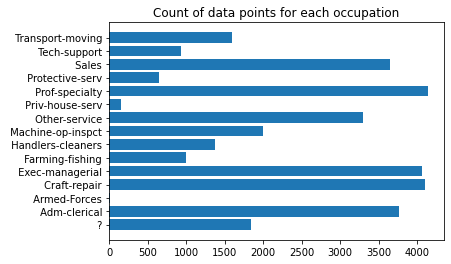

In [118]:
# Display number entries by occupation
plt.barh(y=outlier_df.index,width=outlier_df['count'])
plt.title("Count of data points for each occupation")
plt.show()

In [119]:
# Remove occupations with less than 30 entries
outlier_df = outlier_df[outlier_df['count'] > 30]

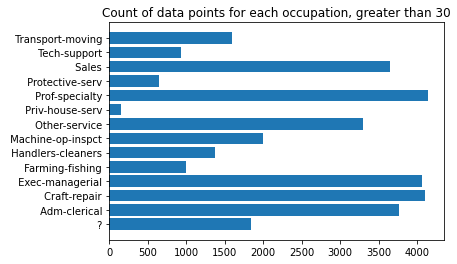

In [120]:
# Display new counts with outlier occupations removed
plt.barh(y=outlier_df.index,width=outlier_df['count'])
plt.title("Count of data points for each occupation, greater than 30")
plt.show()

In [33]:
# Create 2 subsets of df with 10 entries each
dfa = df[['age','fnlwgt','occupation']].sample(10)
dfb = df[['workclass','education','occupation']].sample(10)

In [35]:
# merge dfa and dfb
dfa.merge(dfb, on="occupation")

,age,fnlwgt,occupation,workclass,education
0,25,353795,Adm-clerical,Private,HS-grad
1,25,353795,Adm-clerical,State-gov,Some-college
2,31,182539,Adm-clerical,Private,HS-grad
3,31,182539,Adm-clerical,State-gov,Some-college
4,39,193689,Exec-managerial,Private,Masters
5,42,136986,Exec-managerial,Private,Masters
6,59,141326,Prof-specialty,Private,Assoc-voc
7,59,141326,Prof-specialty,Private,Assoc-acdm
8,59,141326,Prof-specialty,Private,Doctorate
9,47,232628,Craft-repair,Private,HS-grad
